In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
r = open('data.json')

In [3]:
dataset = json.load(r)

In [4]:
df = pd.json_normalize(dataset['data'])

In [5]:
df

,category,event_name,gender,age,marital_status,session_id,device,client_time,location.latitude,location.city,location.state,location.longitude,location.zip_code,amount
0,Sports,View Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632004,40.189788,Lyons,CO,-105.355280,80540,NaN
1,Technology,View Project,M,18-24,single,4459d001feb8438eae5f4ec24abcd992,iOS,1393632022,33.844371,Alpharetta,GA,-84.474050,30009,NaN
2,Environment,View Project,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,1393632032,42.446396,Westford,MA,-71.459405,01886,NaN
3,Technology,View Project,M,18-24,single,68195e2372bd4022b17220fc21de9138,android,1393632038,44.624413,Saranac,NY,-73.809266,12981,NaN
4,Sports,View Project,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,1393632051,36.747083,Lampe,MO,-93.458626,65681,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Sports,Fund Project,F,18-24,married,412b973788704c36a008a506cdbba033,iOS,1396309720,45.343615,West Linn,OR,-122.664926,97068,35.0
49996,Technology,View Project,F,45-54,single,4addd36a6f4347c59865fe04a92e8d57,android,1396309769,41.079983,Greenwich,CT,-73.654472,06831,NaN
49997,Fashion,View Project,F,25-34,single,3181a138a0b94d1da9a3d29f7816fcc7,iOS,1396309893,40.365020,Irwin,PA,-79.584060,15642,NaN
49998,Sports,Fund Project,F,35-44,married,2df6b9a0c66b48a389330327517b9276,iOS,1396309968,39.477625,Martinsville,IN,-86.466792,46151,37.0


In [6]:
df.head()

,category,event_name,gender,age,marital_status,session_id,device,client_time,location.latitude,location.city,location.state,location.longitude,location.zip_code,amount
0,Sports,View Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632004,40.189788,Lyons,CO,-105.355280,80540,NaN
1,Technology,View Project,M,18-24,single,4459d001feb8438eae5f4ec24abcd992,iOS,1393632022,33.844371,Alpharetta,GA,-84.474050,30009,NaN
2,Environment,View Project,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,1393632032,42.446396,Westford,MA,-71.459405,01886,NaN
3,Technology,View Project,M,18-24,single,68195e2372bd4022b17220fc21de9138,android,1393632038,44.624413,Saranac,NY,-73.809266,12981,NaN
4,Sports,View Project,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,1393632051,36.747083,Lampe,MO,-93.458626,65681,NaN


In [7]:
categories = ['Sports','Environment']

In [8]:
dff = df[df.category.isin(categories)]
dff.drop(['location.longitude','location.latitude','client_time'],axis=1,inplace=True)
dff = dff.reset_index(drop=True)

C:\Users\RIDDHI HAKANI\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
dff

,category,event_name,gender,age,marital_status,session_id,device,location.city,location.state,location.zip_code,amount
0,Sports,View Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,Lyons,CO,80540,NaN
1,Environment,View Project,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,Westford,MA,01886,NaN
2,Sports,View Project,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,Lampe,MO,65681,NaN
3,Sports,View Project,F,18-24,married,a1fdfe0bebed4510a9059bcfb3ba1325,iOS,Atlanta,GA,30308,NaN
4,Sports,Fund Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,Lyons,CO,80540,31.0
...,...,...,...,...,...,...,...,...,...,...,...
20074,Environment,Fund Project,M,18-24,married,584713f5385a4ce2b881e877f1fa9a80,android,Atlanta,GA,30313,23.0
20075,Sports,Fund Project,M,18-24,single,4829aa471c6b431fa023076746f7476f,iOS,Westminster,CO,80030,37.0
20076,Environment,Fund Project,F,35-44,single,dbe304febcd94d768740237f37e918cd,android,Sebring,FL,33870,35.0
20077,Sports,Fund Project,F,18-24,married,412b973788704c36a008a506cdbba033,iOS,West Linn,OR,97068,35.0


In [10]:
dff.shape

(20079, 11)

In [11]:
dff.head()

,category,event_name,gender,age,marital_status,session_id,device,location.city,location.state,location.zip_code,amount
0,Sports,View Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,Lyons,CO,80540,NaN
1,Environment,View Project,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,Westford,MA,01886,NaN
2,Sports,View Project,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,Lampe,MO,65681,NaN
3,Sports,View Project,F,18-24,married,a1fdfe0bebed4510a9059bcfb3ba1325,iOS,Atlanta,GA,30308,NaN
4,Sports,Fund Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,Lyons,CO,80540,31.0


In [12]:
dff.describe(include='all')

,category,event_name,gender,age,marital_status,session_id,device,location.city,location.state,location.zip_code,amount
count,20079,20079,20079,20079,20079,20079,20079,20079,20079,20079,8268.000000
unique,2,2,3,5,2,7118,2,2212,51,3570,NaN
top,Sports,View Project,F,18-24,married,a7568791b55048bd85b518194277770a,iOS,Atlanta,IN,97034,NaN
freq,10099,11811,9450,9802,12878,14,12949,2513,3578,683,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.417513
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.817672
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000


Text(0, 0.5, 'amount')

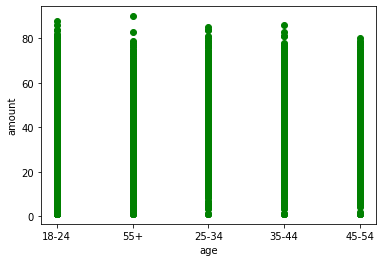

In [13]:
plt.scatter(dff['age'],dff['amount'],label='agev/samount', color='g')
plt.xlabel('age')
plt.ylabel('amount')

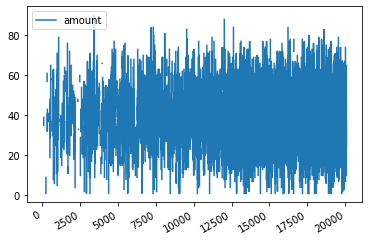

In [14]:
dff.plot(subplots=True)
plt.legend(loc='best')

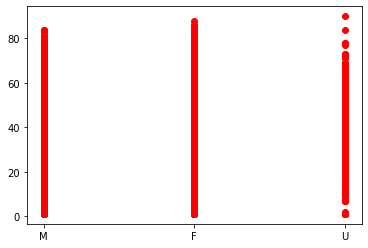

In [15]:
plt.scatter(dff['gender'],dff['amount'],label="genderv/samount",color='r')

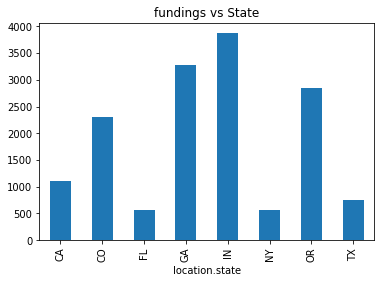

In [16]:
state = df.groupby(['location.state']).count()
amt_per_state = state[state['amount'] > 500].amount
amt_per_state.plot.bar(title="fundings vs State")

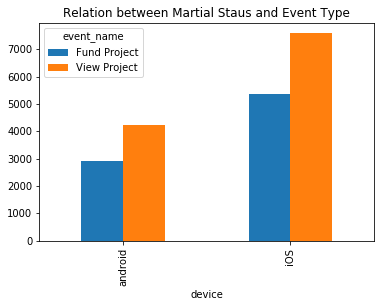

In [18]:
device_event = dff.groupby(['event_name','device']).size().unstack("event_name")
device_event.plot.bar(title="Relation between Martial Staus and Event Type")

Text(0.5, 1.0, 'relation between marital status and amount')

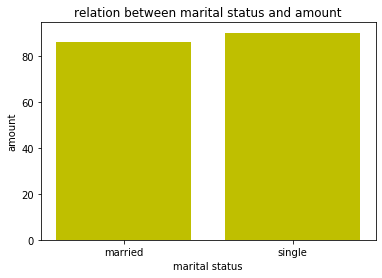

In [19]:
plt.bar(dff['marital_status'],dff['amount'],label='marital_status',color='y')
plt.xlabel('marital status')
plt.ylabel('amount')
plt.title('relation between marital status and amount')